Normalized confusion matrix
[[ 0.72  0.28]
 [ 0.66  0.34]]
Normalized confusion matrix
[[ 0.8   0.2 ]
 [ 0.48  0.52]]
Normalized confusion matrix
[[ 0.84  0.16]
 [ 0.54  0.46]]
Normalized confusion matrix
[[ 0.85  0.15]
 [ 0.33  0.67]]
Normalized confusion matrix
[[ 0.83  0.17]
 [ 0.43  0.57]]
0.69


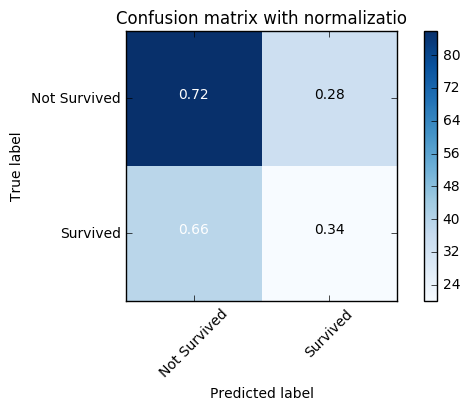

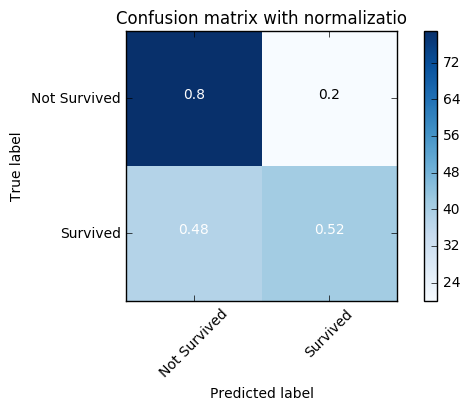

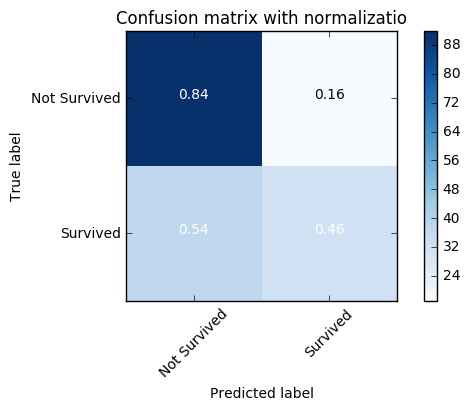

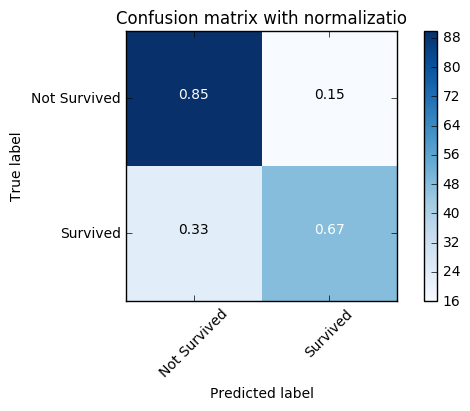

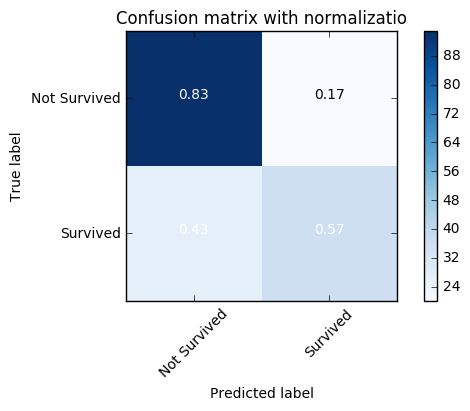

In [1]:
import numpy as np
import pandas as pd
import pylab as P

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc

import matplotlib.pyplot as plt
import itertools

# Import the random forest package
# from sklearn.ensemble import RandomForestClassifier 
# from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

####################################
########## Reuse Function ##########
####################################

def loadDataset(train_path, test_path, type='csv'):
    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)
    return {'train' : train_data, 'test' : test_data}

def dataCleaning(df):
    df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    median_ages = np.zeros((2,3))
    for i in range(0, 2):
        for j in range(0, 3):
            median_ages[i,j] = df[(df['Gender'] == i) & (df['Pclass'] == j+1)]['Age'].dropna().median()
    df['AgeFill'] = df['Age']
    for i in range(0, 2):
        for j in range(0, 3):
            df.loc[ (df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1), 'AgeFill'] = median_ages[i,j]
    df['AgeIsNull'] = pd.isnull(df.Age).astype(int)
    df['FamilySize'] = df['SibSp'] + df['Parch']
    df['Age*Class'] = df.AgeFill * df.Pclass
    df['IntEmbarked'] = df['Embarked'].map( {'C': 0, 'Q': 1, 'S': 2} ).astype(int)
    df = df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Age', 'Embarked'], axis=1)
    return df.values

def randomForestPredict(train_data, test_data):
    forest = RandomForestClassifier(n_estimators = 100)
    forest = forest.fit(train_data[0::,1::],train_data[0::,0])
    return forest.predict(test_data)

def postProcess(output):
    df_output = pd.DataFrame(output)
    df_output['PassengerId'] = data['test']['PassengerId']
    df_output['Survived'] = df_output[0].astype(int)
    result = df_output.drop(df_output.columns[0], axis=1)
    result.to_csv('output/titanic_output_tutorial.csv', index=False)
    return result

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          plot_digit=2):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(decimals=plot_digit)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##########################
########## Main ##########
##########################

data = loadDataset(
    'dataset/train.csv',
    'dataset/test.csv'
)

# Source CODE For Competition
# train_data = dataCleaning(data['train'])
# test_data = dataCleaning(data['test'])
# output = randomForestPredict(train_data, test_data)
# result = postProcess(output)
# result


# Source code for evaluate model
dataset = dataCleaning(data['train'])
X = dataset[0::, 1::]
y = dataset[0::, 0]

kf = KFold(n_splits=5)
accuracy = []
for train, test in kf.split(dataset):
#     clf = RandomForestClassifier(n_estimators = 100)
#     clf = svm.SVC()
    clf = MultinomialNB()

    y_pred = clf.fit(X[train], y[train]).predict(X[test])
    cnf_matrix = confusion_matrix(y[test], y_pred) # evaluate model : array form
    accuracy.append(acc(y[test], y_pred))
    
    # plot confusion_matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, normalize=True, classes=['Not Survived', "Survived"], title='Confusion matrix with normalizatio')

print(np.array(accuracy).mean().round(decimals=2))
plt.show()

# output = randomForestPredict(train_data, test_data)
# result = postProcess(output)
# result